## p2p信用申请评分卡构建

- Author：**xiaoyu**

数据定义：

![image.png](attachment:image.png)

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("bmh")
plt.rc('font', family='SimHei', size=13)
%matplotlib inline

import os

## 数据探索性分析

In [43]:
# 导入数据集，合并训练数据和测试数据
data_train = pd.read_csv('cs-training.csv')
data_test = pd.read_csv('cs-test.csv')
# df = data_train.append(data_test)

In [44]:
data_train.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [46]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


通过观察，含有缺失值的特征有：MonthlyIncome，NumberOfDependents两个。

In [47]:
data_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [49]:
columns = ({'SeriousDlqin2yrs':'IsDlq',
            'RevolvingUtilizationOfUnsecuredLines':'Revol',
           'NumberOfOpenCreditLinesAndLoans':'NumOpen',
           'NumberOfTimes90DaysLate':'Num90late',
           'NumberRealEstateLoansOrLines':'NumEstate',
           'NumberOfTime60-89DaysPastDueNotWorse':'Num60-89late',
           'NumberOfDependents':'NumDependents',
           'NumberOfTime30-59DaysPastDueNotWorse':'Num30-59late'}
          )
# df.rename(columns=columns,inplace = True)
data_train.rename(columns=columns,inplace = True)
data_test.rename(columns=columns,inplace = True)

### 好坏比

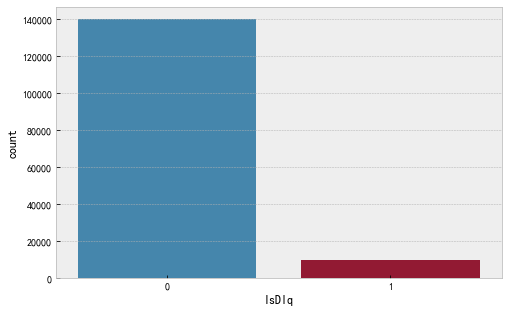

训练集中客户好坏比为：6.68%


In [50]:
plt.figure(figsize=(8,5))
sns.countplot("IsDlq", data=data_train)
plt.show()

badNum = data_train.loc[data_train['IsDlq']==1].shape[0]
goodNum = data_train.loc[data_train['IsDlq']==0].shape[0]
print('训练集中客户好坏比为：{0}%'.format(round(badNum*100/(goodNum+badNum),2)))

数据不均衡，坏用户只占了6.68%，后续进行处理。

### age特征分布

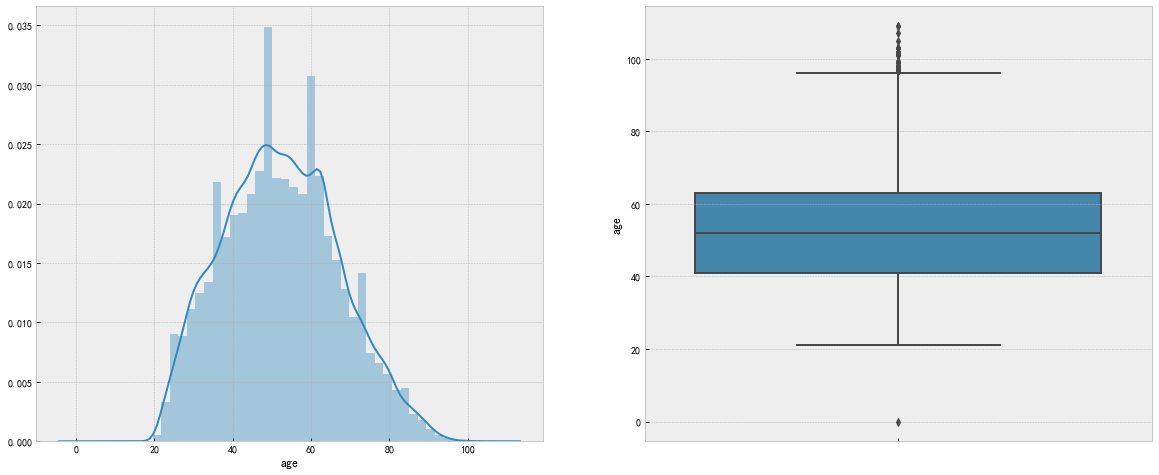

In [51]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data_train['age'],ax=ax1)
sns.boxplot(y='age',data=data_train,ax=ax2)
plt.show()

通过以上观察，发现age特征基本属于正态分布。

虽然后续会使用分箱以及woe方法（增加鲁棒性，增强了对异常值干扰），还是常规性的检查一下异常值。

详细方法可参见：

[https://mp.weixin.qq.com/s?__biz=MzUzODYwMDAzNA==&mid=2247484487&idx=1&sn=b4e93503647d88af2199e300dffd9f1b&chksm=fad4734acda3fa5c60a8c507c6abb0a83d7d89354c87755dee0bd9e7330b6053afdaa073561e&token=1040306797&lang=zh_CN#rd](Python
异常值检测和处理方法)

下面列出两种常规方法：

- 3倍标准差定义异常值

In [52]:
ageMean = np.mean(data_train['age'])
ageStd = np.std(data_train['age'])
ageUpLimit = round((ageMean + 3*ageStd),2)
ageDownLimit = round((ageMean - 3*ageStd),2)
print('年龄异常值上限为：{0}, 下限为：{1}'.format(ageUpLimit,ageDownLimit))

年龄异常值上限为：96.61, 下限为：7.98


- 分箱四分位距定义异常值

In [53]:
# 四分位距观察异常值
agePercentile = np.percentile(data_train['age'],[0,25,50,75,100])
ageIQR = agePercentile[3] - agePercentile[1]
ageUpLimit = agePercentile[3]+ageIQR*1.5
ageDownLimit = agePercentile[1]-ageIQR*1.5
print('年龄异常值上限为：{0}, 下限为：{1}'.format(ageUpLimit,ageDownLimit))
print('上届异常值占比：{0} %'.format(data_train[data_train['age']>96].shape[0]*100/df.shape[0]))
print('下届异常值占比：{0} %'.format(data_train[data_train['age']<8].shape[0]*100/df.shape[0]))

年龄异常值上限为：96.0, 下限为：8.0
上届异常值占比：0.01789243070659197 %
下届异常值占比：0.0003976095712575993 %


上面看到age的分布接近正太分布，因此可以使用三倍标准差方法来查看异常值。但两种方法得到的异常值上下界基本一致。

In [54]:
data_train[data_train['age']<=8]

,Unnamed: 0,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [55]:
data_train[data_train['age']>96].head(5)

,Unnamed: 0,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents
436,437,0,0.007000,97,0,3.000000,NaN,2,0,0,0,NaN
2922,2923,0,0.005043,99,0,800.000000,NaN,5,0,0,0,NaN
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
9359,9360,0,0.000000,97,0,0.000000,0.0,3,0,0,0,0.0
9870,9871,0,0.012737,98,0,0.006503,2152.0,6,0,0,0,0.0


**结论**：
- 明显观察到有个0岁的客户，这实际上不可能，至少要大于18岁成年以后才可以贷款，故将之移除。
- 而年龄大于96岁是有可能的，判断是噪声，并不是异常值，因为大于等于96岁的客户有98人，其中最大的年龄为109。

### age对目标变量的影响

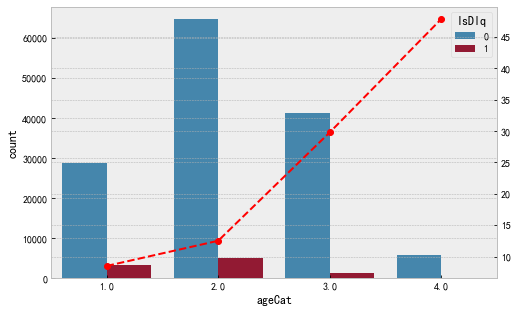

In [56]:
# 对age分箱观察一下年龄段对延期用户的影响
data_train['ageCat'] = np.nan
data_train.loc[(data_train['age']>18)&(data_train['age']<40),'ageCat'] = 1 
data_train.loc[(data_train['age']>=40)&(data_train['age']<60),'ageCat'] = 2 
data_train.loc[(data_train['age']>=60)&(data_train['age']<80),'ageCat'] = 3
data_train.loc[(data_train['age']>=80),'ageCat'] = 4

gbRatioList = {}
for m in data_train['ageCat'].value_counts().index:
    data = data_train.loc[data_train['ageCat']==m]
    gbRatio = data.loc[data['IsDlq']==0].shape[0]/data.loc[data['IsDlq']==1].shape[0]
    gbRatioList[m] = gbRatio
        
f,ax = plt.subplots(figsize=(8,5))
sns.countplot('ageCat', hue='IsDlq', data=data_train, ax=ax)
ax2 = ax.twinx()
ax2.plot(sorted([x-1 for x in gbRatioList.keys()]), sorted([round(x,2) for x in gbRatioList.values()]),'ro--',linewidth=2)
plt.savefig('0.png')
plt.show()

**结论**：可以看到年龄越大，好坏比越大，说明随着年龄增大，违约的比例逐渐减少。这为我们后面woe分箱提供了参考，呈现了单调性。

### RevolvingUtilizationOfUnsecuredLines特征

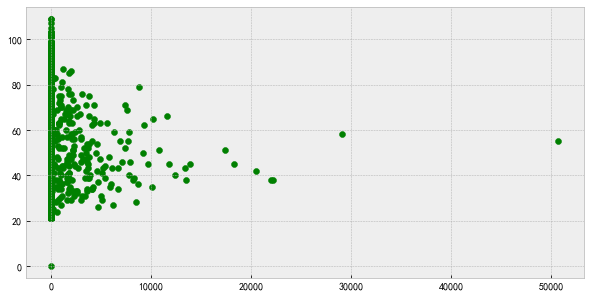

In [57]:
f,ax=plt.subplots(figsize=(10,5))
plt.scatter(data_train['Revol'], data_train['age'],color='g')
plt.show()

**结论：**

这个特征值是百分比。含义是：**除了房贷车贷之外的信用卡账面金额（即贷款金额）/信用卡总额度。**实际上，这个特征值大部分情况是小于1的，因为超出额度属于透支。但是我们发现有很多特征值已经达到了几万，这在实际中是不可能的。推测很有可能是没有除以分母信用卡额度，而是分子的纯信用卡账面贷款金额。

我们需要确定的是透支的最大值是什么？即透支多少算是正常值？数值多大可以确认它是没除以分母的异常值？

1.先通过箱型图的统计方法来判断一下异常边界点。

In [58]:
# 四分位距观察异常值
revolPercentile = np.percentile(data_train['Revol'],[0,25,50,75,100])
revolIQR = revolPercentile[3] - revolPercentile[1]
revolUpLimit = revolPercentile[3]+revolIQR*1.5
revolDownLimit = revolPercentile[1]-revolIQR*1.5
print('年龄异常值上限为：{0}, 下限为：{1}'.format(revolUpLimit,revolDownLimit))
print('上届异常值占比：{0} %'.format(round(data_train[data_train['Revol']>revolUpLimit].shape[0]*100/data_train.shape[0],2)))
print('下届异常值占比：{0} %'.format(round(data_train[data_train['Revol']<revolDownLimit].shape[0]*100/data_train.shape[0],2)))

年龄异常值上限为：1.35281445575, 下限为：-0.7639007662499999
上届异常值占比：0.51 %
下届异常值占比：0.0 %


2.我们进一步观察一下上述结果是否准确。

由于特征值跨度太大，数量分布极其不均匀，因此将特征值分段观察分布情况。

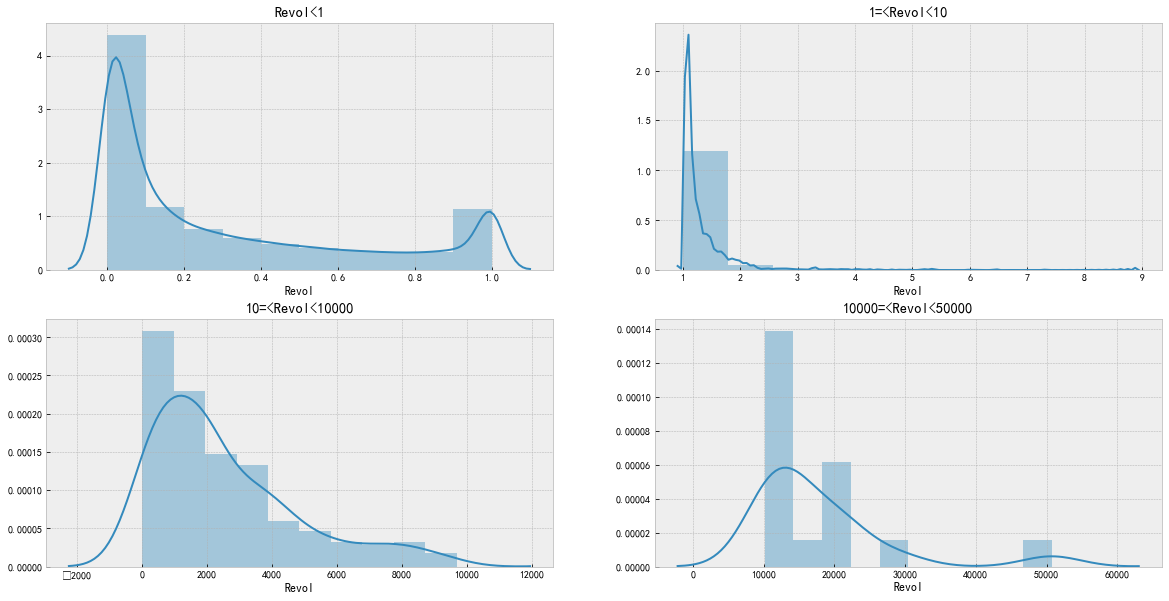

小于1数量占总数量比为：97.77466666666666%
大于等于1的数量为：3338


In [59]:
# 观察RevolvingUtilizationOfUnsecuredLines特征分布
f,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,figsize=(20,10))
sns.distplot(data_train.loc[data_train['Revol']<1,'Revol'],bins=10,ax=ax1)
sns.distplot(data_train.loc[(data_train['Revol']>=1)&(data_train['Revol']<10),'Revol'],bins=10,ax=ax2)
sns.distplot(data_train.loc[(data_train['Revol']>=10)&(data_train['Revol']<10000),'Revol'],bins=10,ax=ax3)
sns.distplot(data_train.loc[(data_train['Revol']>=10000)&(data_train['Revol']<52000),'Revol'],bins=10,ax=ax4)
ax1.set_title('Revol<1')
ax2.set_title('1=<Revol<10')
ax3.set_title('10=<Revol<10000')
ax4.set_title('10000=<Revol<50000')
plt.show()

print('小于1数量占总数量比为：{0}%'.format(data_train.loc[data_train['Revol']<1].shape[0]*100/data_train.shape[0]))
print('大于等于1的数量为：{0}'.format(data_train.loc[data_train['Revol']>=1].shape[0]))

**观察到现象：**
- 小于1的分布中，大部分客户都处于0.1的位置，而随着RevolvingUtilizationOfUnsecuredLines特征值变大，数量成递减趋势；
- 对于其它大于1的数值分布，也都明显的呈现了递减趋势；
- 小于1的特征值占总数量的97%，大于1的数量为5531；

下面来深入研究一下大于1的特征值对坏账率有什么影响，以及找到**透支的阈值**。

In [60]:
# 特征值为10到100之间
data_train[(data_train['Revol']>10)&(data_train['Revol']<100)]

,Unnamed: 0,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents,ageCat
16642,16643,1,14.540918,45,3,1.151865,3726.0,11,0,2,7,3.0,2.0
23292,23293,0,79.000000,39,0,0.336924,9375.0,10,0,2,0,2.0,1.0
31147,31148,1,11.385230,37,0,0.821643,4333.0,9,0,3,1,0.0,1.0
46378,46379,0,95.000000,55,0,1195.000000,NaN,4,0,1,0,NaN,2.0
53719,53720,1,29.784884,35,2,0.535539,5500.0,10,2,0,4,0.0,1.0
54090,54091,0,85.000000,33,0,0.632053,8666.0,11,0,2,0,0.0,1.0
63877,63878,1,12.037116,55,3,0.796490,4500.0,17,0,2,1,1.0,2.0
67670,67671,1,12.462747,59,3,0.714789,7667.0,9,1,1,2,0.0,2.0
68896,68897,0,50.000000,49,0,1.000000,NaN,2,0,0,0,0.0,2.0
87699,87700,0,88.000000,57,0,90.000000,NaN,3,0,0,0,0.0,2.0


**通过上面观察：**Revol特征值在10到100之间中，坏账客户的值多在10到20之间，并且其相应的DebtRatio也很高。而其他Revol特征值高(>20)的但DebtRadio低的并不是坏账客户。因此，**推测可能的异常值阈值（即透支的上限）在20-30左右。**

下面我们通过具体数据来确定具体的阈值在哪。

0到1之间的样本数为：146662 ------ 坏账率为：5.99%
1到10之间的样本数为：3097 ------ 坏账率为：39.52%
10到30之间的样本数为：8 ------ 坏账率为：62.5%
30到100之间的样本数为：10 ------ 坏账率为：10.0%
100到5000之间的样本数为：175 ------ 坏账率为：5.14%
5000到10000之间的样本数为：32 ------ 坏账率为：6.25%
10000到52000之间的样本数为：16 ------ 坏账率为：0.0%


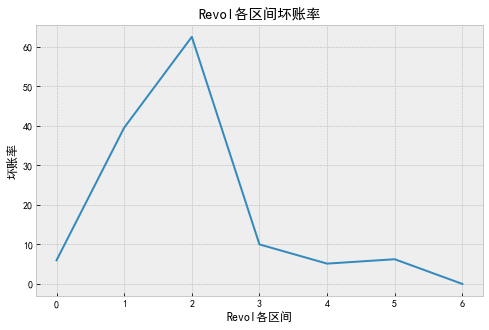

In [61]:
# 确定透支情况下的最大比例
RevoList = [(0,1),(1,10),(10,30),(30,100),(100,5000),(5000,10000),(10000,52000)]
RevoBadRateList = []

for n,elem in enumerate(RevoList):
    Revol = data_train.loc[(data_train['Revol']>=elem[0])
                           &(data_train['Revol']<elem[1])]
    RevoBadRateList.append(Revol[Revol['IsDlq']==1].shape[0]*100/Revol.shape[0])
    print('{0}到{1}之间的样本数为：{2} ------ 坏账率为：{3}%'.format(elem[0],elem[1],Revol.shape[0],round(RevoBadRateList[n],2)))
    
f,ax=plt.subplots(figsize=(8,5))
plt.plot(RevoBadRateList)
ax.set_title('Revol各区间坏账率')
ax.set_xlabel('Revol各区间')
ax.set_ylabel('坏账率')
plt.show()

**结论：**

根据观察的现象，我们可以看到：

0-1之间的坏账率为5.99%。按理说，随着比例升高，坏账率也应该升高，尤其是在透支的情况下。在1-30区间内，已经属于透支状态，坏账率39%，达到了最高。但是透支是不可能无限升高的，会有个阈值。
从30到100区间，坏账率开始下降，坏账率开始下降恢复正常，说明30左右的值（即3000%左右）可能就是正常透支的阈值。

因此，**将数值超过30的都定义为异常值，**并将大于30的值与0-1之间合并。

### NumberOfDependents特征

In [62]:
print('Dependents的缺失值数量为：{0}'.format(data_train[data_train['NumDependents'].isnull()].shape[0]))
print('Dependents的缺失率为：{0}%'.format(round(data_train[data_train['NumDependents'].isnull()].shape[0]*100/data_train.shape[0],2)))

Dependents的缺失值数量为：3924
Dependents的缺失率为：2.62%


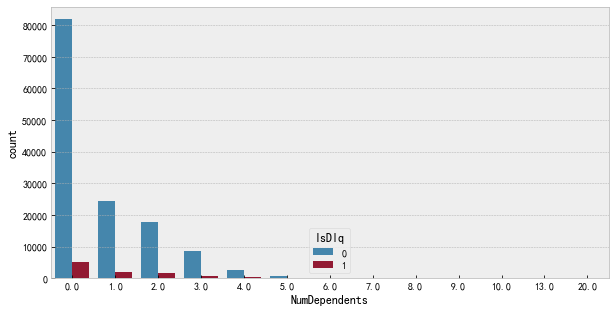

Dependents为0的概率为：0.58%


In [63]:
f,ax=plt.subplots(figsize=(10,5))
sns.countplot(x='NumDependents',hue='IsDlq',data=data_train,ax=ax)
plt.show()
print('Dependents为0的概率为：{0}%'.format(round(df[df['NumDependents']==0].shape[0]/df.shape[0],2)))

In [64]:
# 观察Dependents特征值有无对目标变量的影响
dependentNull = data_train.loc[data_train['NumDependents'].isnull()]
print('Dependents缺失的样本坏账率为：{0}%'.format(round(dependentNull[dependentNull['IsDlq']==1].shape[0]*100
                                              /dependentNull.shape[0],2)))

dependentNotNull = data_train.loc[data_train['NumDependents'].notnull()]
print('Dependents不缺失的样本坏账率为：{0}%'.format(round(dependentNotNull[dependentNotNull['IsDlq']==1].shape[0]*100
                                               /dependentNotNull.shape[0],2)))

Dependents缺失的样本坏账率为：4.56%
Dependents不缺失的样本坏账率为：6.74%


Dependents缺失值情况下坏账率没有明显区别

In [65]:
data_train.loc[(data_train['NumDependents'].isnull())&(data_train['MonthlyIncome'].isnull())].shape[0]

3924

**发现：**NumberOfDependents的缺失值为6550个，而NumberOfDependents和MonthlyIncome同时缺失的数量也是6550个。

**结论：**
- 说明NumberOfDependents缺失的样本MonthlyIncome也缺失。

我们想要通过找相似的方法来填补缺失的Dependents，因为有以上结论，所以我们观察一下MonthlyIncome缺失，但NumberOfDependents不缺失的样本是如何的。

In [69]:
data_train['MonthlyIncome'].isnull().astype('int64').value_counts()

0    120269
1     29731
Name: MonthlyIncome, dtype: int64

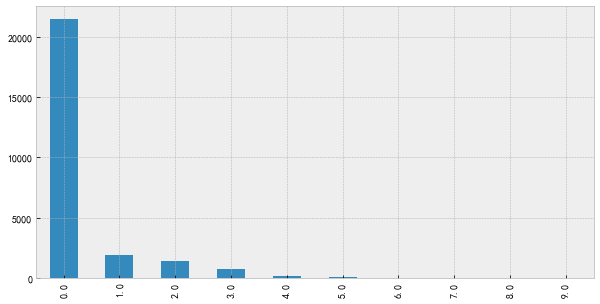

In [82]:
DependentFullIncomeNull = data_train.loc[(data_train['MonthlyIncome'].isnull())&(data_train['NumDependents'].notnull()),'NumDependents']
DependentFullIncomeNull.value_counts().plot(kind='bar', figsize=(10,5))

可以看到，这种情况下几乎所有的Dependents都是0（众数），其它占比很少。因此，我们将Dependents缺失值的用0来填补。

### MonthlyIncome特征

E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
E:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


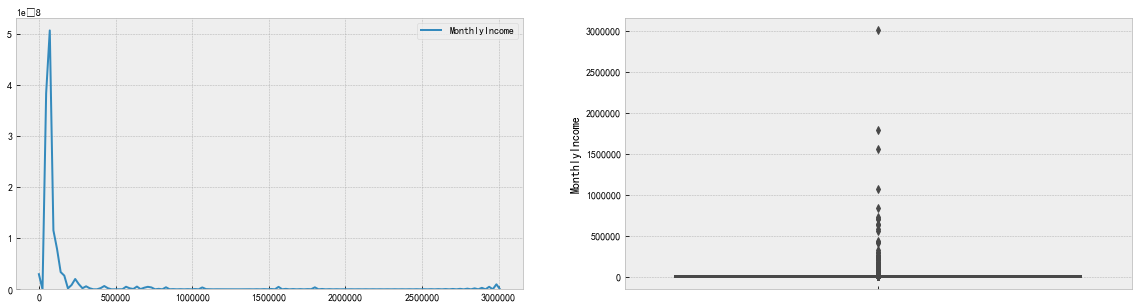

In [83]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.kdeplot(data_train['MonthlyIncome'],ax=ax1)
sns.boxplot(y='MonthlyIncome',data=data_train,ax=ax2)
plt.show()

MonthlyIncome特征分布是明显的偏分布，一些用户的月公司高达8000000，这个数值可能是异常值，也可能是确实有这么高的月薪。不过我们最后要进行分箱处理，会削弱异常值的影响。

In [84]:
print('MonthlyIncome的缺失值数量为：{0}'.format(data_train[data_train['MonthlyIncome'].isnull()].shape[0]))
print('MonthlyIncome的缺失率为：{0}%'.format(round(data_train[data_train['MonthlyIncome'].isnull()].shape[0]*100/data_train.shape[0],2)))

MonthlyIncome的缺失值数量为：29731
MonthlyIncome的缺失率为：19.82%


由于缺失值占比达到近20%，直接删除会损失数据信息，中位数/平均数进行大量填补效果并不好，这里选择随机森林建模预测缺失值。

In [98]:
data_train.head()

,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents,ageCat
0,1,1.0,45,2,1.0,9120.0,13,0,6,0,2,2.0
1,0,1.0,40,0,1.0,2600.0,4,0,0,0,1,2.0
2,0,1.0,38,1,1.0,3042.0,2,1,0,0,0,1.0
3,0,1.0,30,0,1.0,3300.0,5,0,0,0,0,1.0
4,0,1.0,49,1,1.0,63588.0,7,0,1,0,0,2.0


In [85]:
# 用随机森林对缺失值进行预测
from sklearn.ensemble import RandomForestRegressor
  
def fillinMotnlyIncome(df):
    # 处理数集
    process_miss = df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    #分成已知特征与未知特征
    known = process_miss[process_miss.MonthlyIncome.notnull()].as_matrix()
    unknown = process_miss[process_miss.MonthlyIncome.isnull()].as_matrix()
    #X，要训练的特征
    X = known[:,1:]
    #y ,结果标签
    y = known[:,0]
    #训练模型
    rf = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
    rf.fit(X,y)
    #预测缺失值
    pred = rf.predict( unknown[:,1:]).round(0)
    #补缺缺失值
    return pred

### Num30-59 | 60-89 | 90 late特征

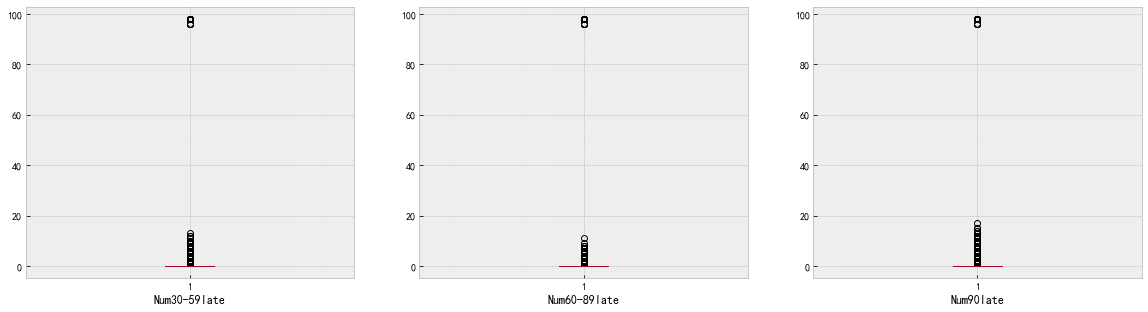

In [86]:
f,[ax,ax1,ax2]=plt.subplots(1,3,figsize=(20,5))
# sns.boxplot(y=['Num30-59late','Num90late'],data=df,ax=ax)
ax.boxplot(x=data_train['Num30-59late'])
ax1.boxplot(x=data_train['Num60-89late'])
ax2.boxplot(x=data_train['Num90late'])
ax.set_xlabel('Num30-59late')
ax1.set_xlabel('Num60-89late')
ax2.set_xlabel('Num90late')
plt.show()

三个指标都存在异常值，且异常值离很明显，都超过了90。

### DebtRatio

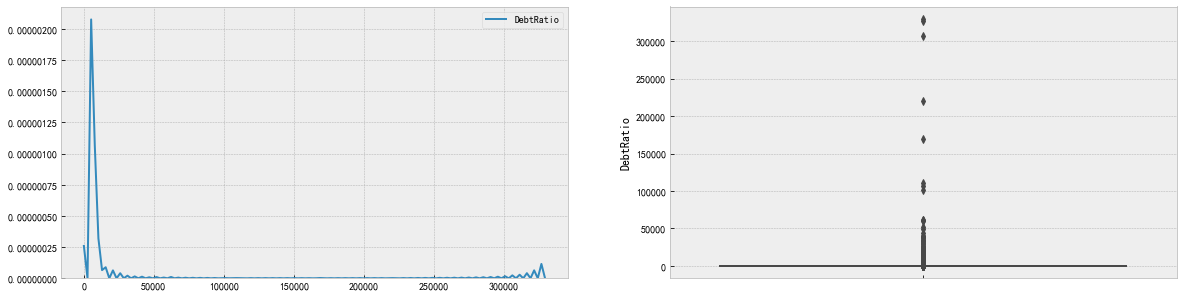

In [87]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.kdeplot(data_train['DebtRatio'],ax=ax1)
sns.boxplot(y='DebtRatio',data=data_train,ax=ax2)
plt.show()

In [88]:
# df.loc[df['DebtRatio']>100,'DebtRatio']

0到1之间的样本数为：114634 ------ 坏账率为：6.74%
1到1.5之间的样本数为：3291 ------ 坏账率为：12.64%
1.5到2之间的样本数为：860 ------ 坏账率为：14.42%
2到10之间的样本数为：2221 ------ 坏账率为：6.26%
10到30之间的样本数为：1857 ------ 坏账率为：4.47%
30到100之间的样本数为：2735 ------ 坏账率为：4.46%
100到50000之间的样本数为：24390 ------ 坏账率为：5.78%
50000到350000之间的样本数为：12 ------ 坏账率为：0.0%


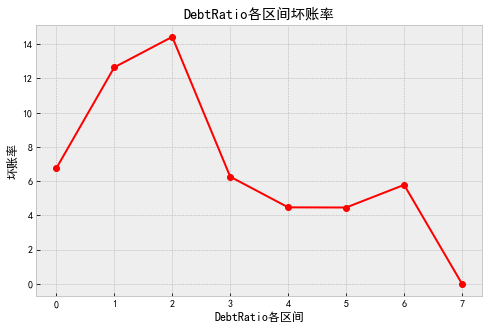

In [89]:
# 确定透支情况下的最大比例
DebtList = [(0,1),(1,1.5),(1.5,2),(2,10),(10,30),(30,100),(100,50000),(50000,350000)]
DebtBadRateList = []

for n,elem in enumerate(DebtList):
    Debt = data_train.loc[(data_train['DebtRatio']>=elem[0])
                           &(data_train['DebtRatio']<elem[1])]
    DebtBadRateList.append(Debt[Debt['IsDlq']==1].shape[0]*100/Debt.shape[0])
    print('{0}到{1}之间的样本数为：{2} ------ 坏账率为：{3}%'.format(elem[0],elem[1],Debt.shape[0],round(DebtBadRateList[n],2)))
    
f,ax=plt.subplots(figsize=(8,5))
plt.plot(DebtBadRateList,'ro-',linewidth=2)
ax.set_title('DebtRatio各区间坏账率')
ax.set_xlabel('DebtRatio各区间')
ax.set_ylabel('坏账率')
plt.show()

将debtratio>2的都视为异常值，并将这些异常值与0-1之间的debtratio分为一组。

### NumberOfOpenCreditLinesAndLoans

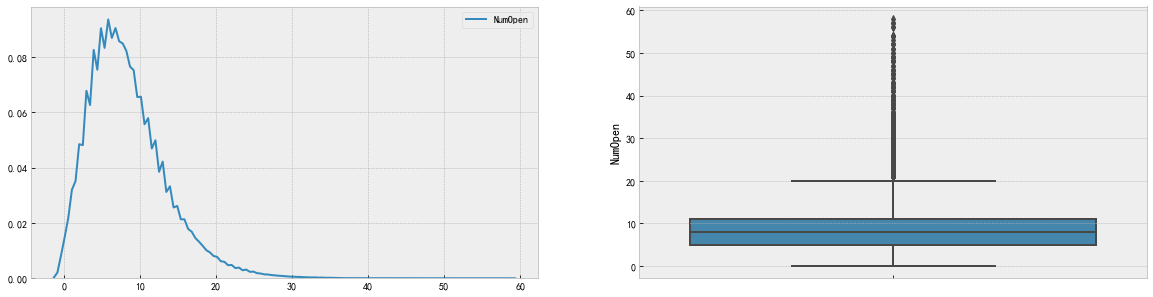

In [90]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.kdeplot(data_train['NumOpen'],ax=ax1)
sns.boxplot(y='NumOpen',data=data_train,ax=ax2)
plt.show()

看到大于80的值为明显的异常值。

### NumberRealEstateLoansOrLines

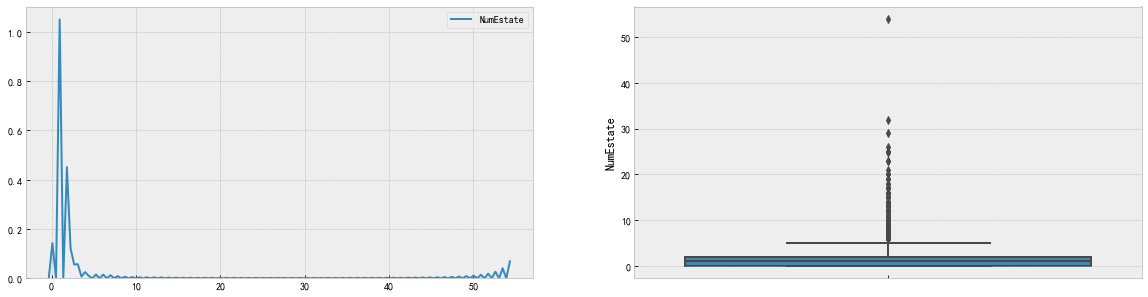

In [91]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.kdeplot(data_train['NumEstate'],ax=ax1)
sns.boxplot(y='NumEstate',data=data_train,ax=ax2)
plt.show()

看到大于50的值为明显异常值。